In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
from scipy.spatial.distance import mahalanobis
%matplotlib inline

In [2]:
ts_data = pd.read_csv("accidental-deaths-in-usa-monthly.csv")

In [3]:
mon = []
deaths = []

for idx, row in ts_data.iterrows():
    mon.append(row["Month"])
    deaths.append(row["Accidental deaths in USA: monthly, 1973 ? 1978"])
    
mon.pop()
deaths.pop()

' 1973 ? 1978'

In [21]:
train = (list(zip(mon, deaths)))[:12 * 5]
test = (list(zip(mon, deaths)))[12 * 5:]
death_train = np.asarray(deaths[:12 * 5], dtype=int).reshape(60, 1)
x = np.asarray([[i] for i in range(60)]).reshape(60, 1)

In [76]:
lr = LinearRegression().fit(x, death_train)
print(lr.coef_, lr.intercept_)

[[-16.2076688]] [ 9264.05956284]


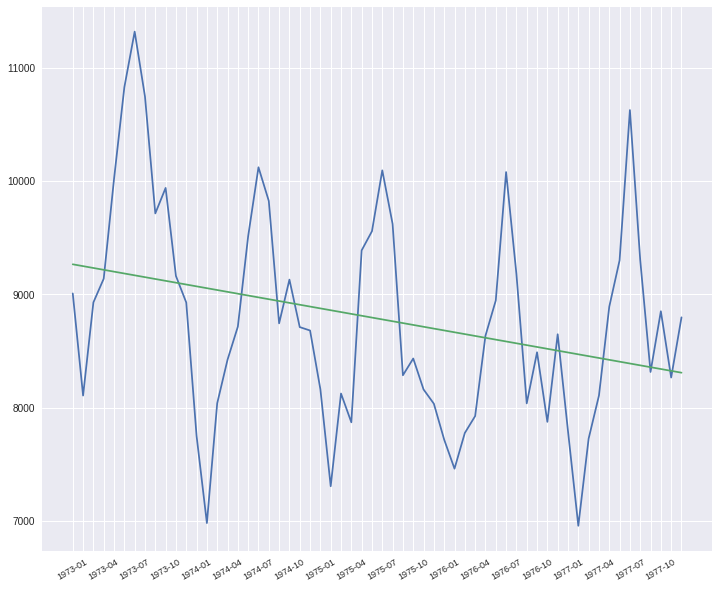

In [39]:
deaths = [int(d) for d in deaths]
f = lambda s: s if (s[5:] in ["01", "04", "07", "10"]) else ""
mon1 = [f(s) for s in mon]

sns.plt.figure(figsize=(12, 10))
sns.plt.plot([i for i in range(60)], deaths[:60])
sns.plt.xticks(range(60), mon1[:60], rotation=30, fontsize=9)
sns.plt.plot(x.reshape(60, ), [lr.predict(a[0])[0,0] for a in x])
# sns.plt.show()
sns.plt.savefig("DM_10_1.png")

In [43]:
U = [lr.predict(a[0])[0,0] for a in x]

In [44]:
S = [np.mean([deaths[t + j*12] - U[t + j*12] 
              for j in range(5)]) 
     for t in range(12)]

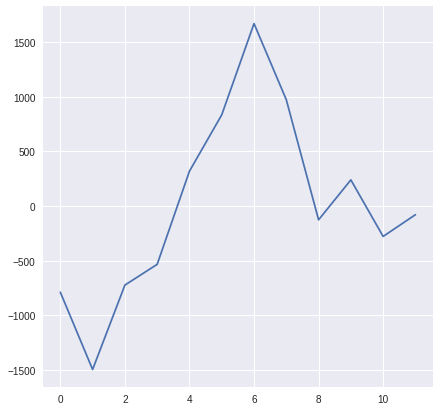

In [79]:
sns.plt.figure(figsize=(7, 7))
sns.plt.plot(range(12), S)
sns.plt.savefig('DM_10_3.png')

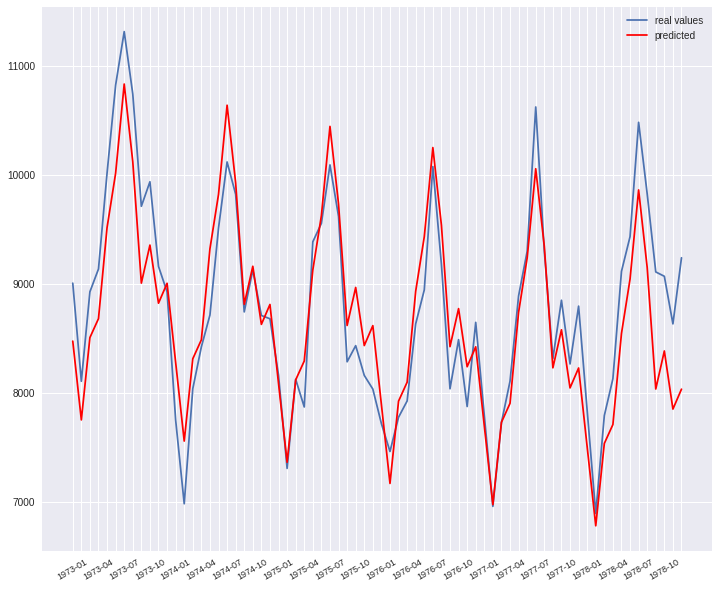

In [51]:
sns.plt.figure(figsize=(12, 10))
sns.plt.plot([i for i in range(72)], deaths)
sns.plt.xticks(range(72), mon1, rotation=30, fontsize=9)
sns.plt.plot(range(72), 
             [S[i % 12] + U[i] for i in range(60)] + [S[i % 12] + lr.predict(i) for i in range(60, 72)],
            c='red')
sns.plt.legend(['real values', 'predicted'])
sns.plt.savefig('DM_10_2.png')

In [58]:
res = [S[i % 12] + U[i] for i in range(60)] + [S[i % 12] + lr.predict(i) for i in range(60, 72)]
deaths = np.asarray(deaths).reshape(1, 72)
res = np.asarray(res).reshape(1, 72)

In [62]:
print(euclidean_distances(deaths[:, 60:], res[:, 60:]),
      euclidean_distances(deaths, res))

[[ 2319.88550026]] [[ 3641.332685]]


In [66]:
print(pearsonr(deaths[:, 60:].reshape(12, ), res[:, 60:].reshape(12, )),
      pearsonr(deaths.reshape(72, ), res.reshape(72, )))

(0.95053080327670791, 2.1467266279732979e-06) (0.89888678110842601, 8.6787712038146414e-27)


In [75]:
X = np.vstack([deaths, res])
V = np.cov(X.T)
VI = np.linalg.inv(V)
X1 = np.vstack([deaths[:, 60:].reshape(12, ), res[:, 60:].reshape(12, )])
V1 = np.cov(X1.T)
VI1 = np.linalg.pinv(V1)
print(mahalanobis(deaths[:, 60:].reshape(12, ), res[:, 60:].reshape(12, ), VI1),
      mahalanobis(deaths.reshape(72, ), res.reshape(72, ), VI))

1.41421356237 5.58651614283
